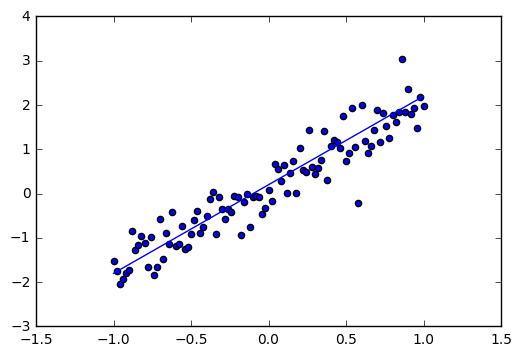

In [1]:
#Generate sample random distribution
import matplotlib.pyplot as plt
import numpy as np
trX = np.linspace(-1,1,101)
trY = 2*trX+np.random.randn(*trX.shape)*0.40+0.2
plt.figure()
plt.scatter(trX,trY)
plt.plot(trX, .2+2*trX)
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


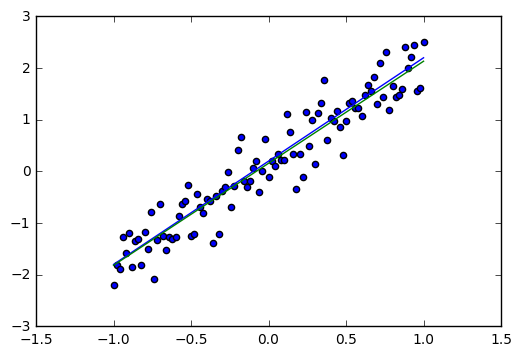

1.97509
0.158254


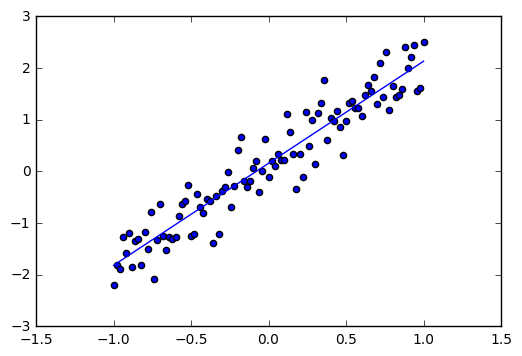

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

trX = np.linspace(-1,1,101)
trY = 2*trX+np.random.randn(*trX.shape)*0.4+0.2

plt.scatter(trX,trY)
plt.plot(trX,.2+2*trX)

X = tf.placeholder('float', name='X')
Y = tf.placeholder('float', name='Y')

with tf.name_scope('Model'):
    def model(X,w,b):
        return tf.multiply(X,w)+b
    w = tf.Variable(-1.0, name='b0')
    b = tf.Variable(-2.0, name='b1')
    y_model = model(X,w,b)

with tf.name_scope('CostFunction'):
    cost = (tf.pow(Y-y_model, 2))
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

sess = tf.Session()
init = tf.initialize_all_variables()
tf.train.write_graph(sess.graph,'/tmp','graph.pbtxt')
cost_op = tf.summary.scalar('loss',cost)
merged = tf.summary.merge_all()
sess.run(init)
writer = tf.summary.FileWriter('/tmp', sess.graph)

for i in range(100):
    for (x,y) in zip(trX, trY):
        sess.run(train_op,feed_dict={X:x,Y:y})
        summary_str = sess.run(cost_op, feed_dict={X:x,Y:y})
        writer.add_summary(summary_str, i)
b0temp = b.eval(session=sess)
b1temp = w.eval(session=sess)
plt.plot(trX, b0temp + b1temp*trX)
plt.show()

print(sess.run(w))
print(sess.run(b))
plt.scatter(trX,trY)
plt.plot(trX, sess.run(b)+trX*sess.run(w))
plt.show()